In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('../dataset/train.csv', index_col='PassengerId')
test_df = pd.read_csv('../dataset/test.csv', index_col='PassengerId')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
train_df.loc[0:5,]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# dispersion measures
print('Mean fare : {0}'.format(train_df.Fare.mean())) # mean
print('Median fare : {0}'.format(train_df.Fare.median())) # median
print('Min fare : {0}'.format(train_df.Fare.min())) # minimum
print('Max fare : {0}'.format(train_df.Fare.max())) # maximum
print('Fare range : {0}'.format(train_df.Fare.max()  - train_df.Fare.min())) # range
print('25 percentile : {0}'.format(train_df.Fare.quantile(.25))) # 25 percentile
print('50 percentile : {0}'.format(train_df.Fare.quantile(.5))) # 50 percentile
print('75 percentile : {0}'.format(train_df.Fare.quantile(.75))) # 75 percentile
print('Variance fare : {0}'.format(train_df.Fare.var())) # variance
print('Standard deviation fare : {0}'.format(train_df.Fare.std())) # standard deviation

Mean fare : 32.2042079685746
Median fare : 14.4542
Min fare : 0.0
Max fare : 512.3292
Fare range : 512.3292
25 percentile : 7.9104
50 percentile : 14.4542
75 percentile : 31.0
Variance fare : 2469.436845743117
Standard deviation fare : 49.693428597180905


In [7]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
train_df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [9]:
train_df[train_df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
train_df.groupby(['Embarked', 'Sex']).Fare.median()

Embarked  Sex   
C         female    56.92920
          male      24.00000
Q         female     7.76875
          male       7.75000
S         female    24.15000
          male      10.50000
Name: Fare, dtype: float64

In [11]:
train_df.Embarked.fillna('C', inplace=True) # replace nan Embarked with C

In [12]:
test_df[test_df.Embarked.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


In [13]:
train_df[train_df.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [14]:
test_df[test_df.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [15]:
median_fare = test_df.loc[(test_df.Pclass == 3) & (test_df.Embarked == 'S'),'Fare'].median()
print(median_fare)

8.05


In [16]:
test_df.Fare.fillna(median_fare, inplace=True) # replace nan Fare with median

In [17]:
display(train_df[train_df.Age.isnull()])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C


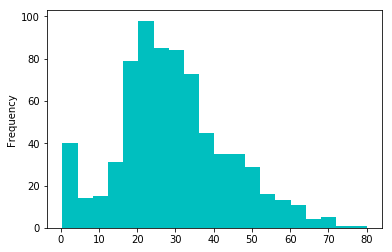

In [18]:
%matplotlib inline
train_df.Age.plot(kind='hist', bins=20, color='c');

In [19]:
train_df.Age.mean()

29.69911764705882

In [20]:
train_df.groupby('Sex').Age.median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

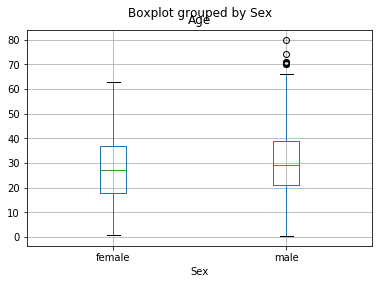

In [21]:
train_df[train_df.Age.notnull()].boxplot('Age','Sex');

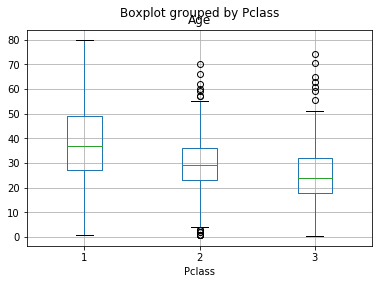

In [22]:
train_df[train_df.Age.notnull()].boxplot('Age','Pclass');

In [23]:
train_df.Name

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
6                                       Moran, Mr. James
7                                McCarthy, Mr. Timothy J
8                         Palsson, Master. Gosta Leonard
9      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                   Nasser, Mrs. Nicholas (Adele Achem)
11                       Sandstrom, Miss. Marguerite Rut
12                              Bonnell, Miss. Elizabeth
13                        Saundercock, Mr. William Henry
14                           Andersson, Mr. Anders Johan
15                  Vestrom, Miss. Hulda Amanda Adolfina
16                      Hewlett, Mrs. (Mary D Kingcome) 
17                                  Rice, Master. Eugene
18                 

In [24]:
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [25]:
train_df.Name.map(lambda x : GetTitle(x))

PassengerId
1          mr
2         mrs
3        miss
4         mrs
5          mr
6          mr
7          mr
8      master
9         mrs
10        mrs
11       miss
12       miss
13         mr
14         mr
15       miss
16        mrs
17     master
18         mr
19        mrs
20        mrs
21         mr
22         mr
23       miss
24         mr
25       miss
26        mrs
27         mr
28         mr
29       miss
30         mr
        ...  
862        mr
863       mrs
864      miss
865        mr
866       mrs
867      miss
868        mr
869        mr
870    master
871        mr
872       mrs
873        mr
874        mr
875       mrs
876      miss
877        mr
878        mr
879        mr
880       mrs
881       mrs
882        mr
883      miss
884        mr
885        mr
886       mrs
887       rev
888      miss
889      miss
890        mr
891        mr
Name: Name, Length: 891, dtype: object

In [26]:
train_df.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer'], dtype=object)

In [27]:
test_df.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'ms', 'col', 'rev', 'dr', 'dona'],
      dtype=object)

In [28]:
def GetTitle(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [29]:
train_df['Title'] =  train_df.Name.map(lambda x : GetTitle(x))

In [30]:
test_df['Title'] =  test_df.Name.map(lambda x : GetTitle(x))

In [31]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


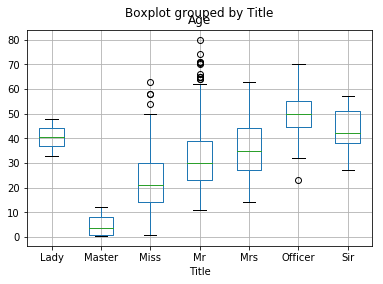

In [32]:
train_df[train_df.Age.notnull()].boxplot('Age','Title');

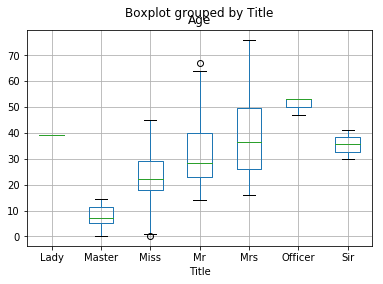

In [33]:
test_df[test_df.Age.notnull()].boxplot('Age','Title');

In [34]:
train_title_age_median = train_df.groupby('Title').Age.transform('median')
train_df.Age.fillna(train_title_age_median , inplace=True)

test_title_age_median = test_df.groupby('Title').Age.transform('median')
test_df.Age.fillna(test_title_age_median , inplace=True)

In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
Title       418 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 39.2+ KB


In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
Title       891 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 130.5+ KB


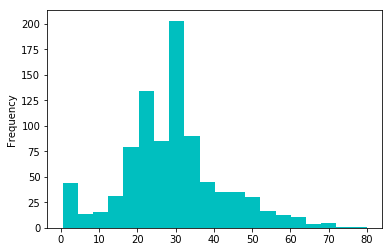

In [37]:
# outliers

train_df.Age.plot(kind='hist', bins=20, color='c');

In [38]:
train_df.loc[train_df.Age > 70]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Mr
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,Mr
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Mr
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,Mr
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,Mr


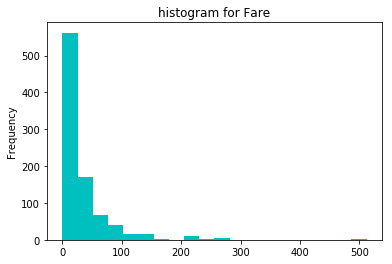

In [39]:
# histogram for fare
train_df.Fare.plot(kind='hist', title='histogram for Fare', bins=20, color='c');

In [40]:
# Try some transformations to reduce the skewness
LogFare_train = np.log(train_df.Fare + 1.0) # Adding 1 to accomodate zero fares : log(0) is not defined
LogFare_test = np.log(test_df.Fare + 1.0) 

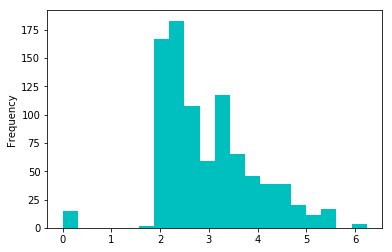

In [41]:
LogFare_train.plot(kind='hist', color='c', bins=20);

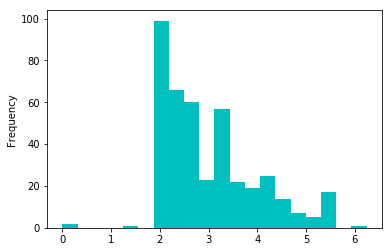

In [42]:
LogFare_test.plot(kind='hist', color='c', bins=20);

In [43]:
pd.qcut(train_df.Fare, 4)

PassengerId
1       (-0.001, 7.91]
2      (31.0, 512.329]
3       (7.91, 14.454]
4      (31.0, 512.329]
5       (7.91, 14.454]
6       (7.91, 14.454]
7      (31.0, 512.329]
8       (14.454, 31.0]
9       (7.91, 14.454]
10      (14.454, 31.0]
11      (14.454, 31.0]
12      (14.454, 31.0]
13      (7.91, 14.454]
14     (31.0, 512.329]
15      (-0.001, 7.91]
16      (14.454, 31.0]
17      (14.454, 31.0]
18      (7.91, 14.454]
19      (14.454, 31.0]
20      (-0.001, 7.91]
21      (14.454, 31.0]
22      (7.91, 14.454]
23      (7.91, 14.454]
24     (31.0, 512.329]
25      (14.454, 31.0]
26     (31.0, 512.329]
27      (-0.001, 7.91]
28     (31.0, 512.329]
29      (-0.001, 7.91]
30      (-0.001, 7.91]
            ...       
862     (7.91, 14.454]
863     (14.454, 31.0]
864    (31.0, 512.329]
865     (7.91, 14.454]
866     (7.91, 14.454]
867     (7.91, 14.454]
868    (31.0, 512.329]
869     (7.91, 14.454]
870     (7.91, 14.454]
871     (-0.001, 7.91]
872    (31.0, 512.329]
873     (-0.001, 7.91]

In [44]:
pd.qcut(train_df.Fare, 4, labels=['very_low','low','high','very_high']) # discretization

PassengerId
1       very_low
2      very_high
3            low
4      very_high
5            low
6            low
7      very_high
8           high
9            low
10          high
11          high
12          high
13           low
14     very_high
15      very_low
16          high
17          high
18           low
19          high
20      very_low
21          high
22           low
23           low
24     very_high
25          high
26     very_high
27      very_low
28     very_high
29      very_low
30      very_low
         ...    
862          low
863         high
864    very_high
865          low
866          low
867          low
868    very_high
869          low
870          low
871     very_low
872    very_high
873     very_low
874          low
875         high
876     very_low
877          low
878     very_low
879     very_low
880    very_high
881         high
882     very_low
883          low
884          low
885     very_low
886         high
887          low
888         high
88

In [45]:
pd.qcut(test_df.Fare, 4, labels=['very_low','low','high','very_high']) # discretization

PassengerId
892      very_low
893      very_low
894           low
895           low
896           low
897           low
898      very_low
899          high
900      very_low
901          high
902      very_low
903          high
904     very_high
905          high
906     very_high
907          high
908           low
909      very_low
910           low
911      very_low
912     very_high
913      very_low
914     very_high
915     very_high
916     very_high
917          high
918     very_high
919      very_low
920          high
921          high
          ...    
1280     very_low
1281         high
1282    very_high
1283    very_high
1284         high
1285          low
1286         high
1287    very_high
1288     very_low
1289    very_high
1290     very_low
1291     very_low
1292    very_high
1293         high
1294    very_high
1295    very_high
1296         high
1297          low
1298          low
1299    very_high
1300     very_low
1301          low
1302     very_low
1303    very_hig

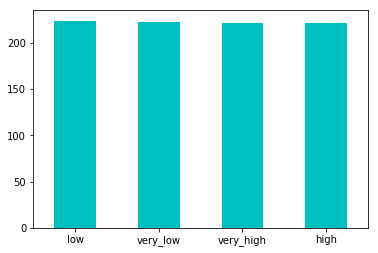

In [46]:
pd.qcut(train_df.Fare, 4, labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar', color='c', rot=0);

In [47]:
train_df['Fare_Bin'] = pd.qcut(train_df.Fare, 4, labels=['very_low','low','high','very_high'])
test_df['Fare_Bin'] = pd.qcut(test_df.Fare, 4, labels=['very_low','low','high','very_high'])

In [48]:
#####

In [49]:
train_df['AgeState'] = np.where(train_df['Age'] >= 18, 'Adult','Child')

In [50]:
test_df['AgeState'] = np.where(test_df['Age'] >= 18, 'Adult','Child')

In [51]:
train_df['AgeState'].value_counts()

Adult    774
Child    117
Name: AgeState, dtype: int64

In [52]:
pd.crosstab(train_df.Survived, train_df.AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


In [53]:
train_df['FamilySize'] = train_df.Parch + train_df.SibSp + 1
test_df['FamilySize'] = test_df.Parch + test_df.SibSp + 1

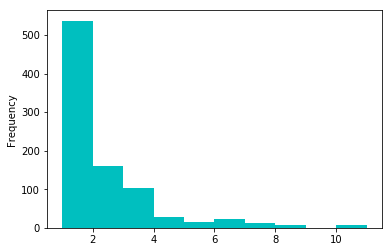

In [54]:
train_df['FamilySize'].plot(kind='hist', color='c');

In [55]:
train_df.loc[train_df.FamilySize == train_df.FamilySize.max(),['Name','Survived','FamilySize','Ticket']]

,Name,Survived,FamilySize,Ticket
PassengerId,,,,
160,"Sage, Master. Thomas Henry",0,11,CA. 2343
181,"Sage, Miss. Constance Gladys",0,11,CA. 2343
202,"Sage, Mr. Frederick",0,11,CA. 2343
325,"Sage, Mr. George John Jr",0,11,CA. 2343
793,"Sage, Miss. Stella Anna",0,11,CA. 2343
847,"Sage, Mr. Douglas Bullen",0,11,CA. 2343
864,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343


In [56]:
pd.crosstab(train_df.Survived, train_df.FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [57]:
# is mother
# a lady aged more thana 18 who has Parch >0 and is married (not Miss)
train_df['IsMother'] = ((train_df.Sex == 'female') & (train_df.Parch > 0) & (train_df.Age > 18) & (train_df.Title != 'Miss'))



In [58]:
pd.crosstab(train_df.Survived, train_df.IsMother)

IsMother,False,True
Survived,,
0,533,16
1,303,39


In [59]:
test_df['IsMother'] = ((test_df.Sex == 'female') & (test_df.Parch > 0) & (test_df.Age > 18) & (test_df.Title != 'Miss'))


In [60]:
# Deck
train_df.Cabin

PassengerId
1              NaN
2              C85
3              NaN
4             C123
5              NaN
6              NaN
7              E46
8              NaN
9              NaN
10             NaN
11              G6
12            C103
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             D56
23             NaN
24              A6
25             NaN
26             NaN
27             NaN
28     C23 C25 C27
29             NaN
30             NaN
          ...     
862            NaN
863            D17
864            NaN
865            NaN
866            NaN
867            NaN
868            A24
869            NaN
870            NaN
871            NaN
872            D35
873    B51 B53 B55
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            NaN
880            C50
881            NaN
882            NaN


In [61]:
train_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [62]:
train_df.loc[train_df.Cabin == 'T']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,Mr,very_high,Adult,1,False


In [63]:
test_df.loc[test_df.Cabin == 'T']

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,


In [64]:
train_df.loc[train_df.Cabin == 'T', 'Cabin'] = np.NaN

In [65]:
# extract first character of Cabin string to the deck
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
train_df['Deck'] = train_df['Cabin'].map(lambda x : get_deck(x))
test_df['Deck'] = test_df['Cabin'].map(lambda x : get_deck(x))

In [66]:
train_df.Deck.value_counts()

Z    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: Deck, dtype: int64

In [67]:
pd.crosstab(train_df.Survived, train_df.Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 17 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Ticket        891 non-null object
Fare          891 non-null float64
Cabin         203 non-null object
Embarked      891 non-null object
Title         891 non-null object
Fare_Bin      891 non-null category
AgeState      891 non-null object
FamilySize    891 non-null int64
IsMother      891 non-null bool
Deck          891 non-null object
dtypes: bool(1), category(1), float64(2), int64(5), object(8)
memory usage: 153.3+ KB


In [69]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 16 columns):
Pclass        418 non-null int64
Name          418 non-null object
Sex           418 non-null object
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Ticket        418 non-null object
Fare          418 non-null float64
Cabin         91 non-null object
Embarked      418 non-null object
Title         418 non-null object
Fare_Bin      418 non-null category
AgeState      418 non-null object
FamilySize    418 non-null int64
IsMother      418 non-null bool
Deck          418 non-null object
dtypes: bool(1), category(1), float64(2), int64(4), object(8)
memory usage: 70.0+ KB


In [70]:
# sex
train_df['IsMale'] = np.where(train_df.Sex == 'male', 1, 0)
test_df['IsMale'] = np.where(test_df.Sex == 'male', 1, 0)

In [71]:
train_df = pd.get_dummies(train_df,columns=['Deck', 'Pclass','Title', 'Fare_Bin', 'Embarked','AgeState'])
test_df = pd.get_dummies(test_df,columns=['Deck', 'Pclass','Title', 'Fare_Bin', 'Embarked','AgeState'])

In [72]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 39 columns):
Survived              891 non-null int64
Name                  891 non-null object
Sex                   891 non-null object
Age                   891 non-null float64
SibSp                 891 non-null int64
Parch                 891 non-null int64
Ticket                891 non-null object
Fare                  891 non-null float64
Cabin                 203 non-null object
FamilySize            891 non-null int64
IsMother              891 non-null bool
IsMale                891 non-null int64
Deck_A                891 non-null uint8
Deck_B                891 non-null uint8
Deck_C                891 non-null uint8
Deck_D                891 non-null uint8
Deck_E                891 non-null uint8
Deck_F                891 non-null uint8
Deck_G                891 non-null uint8
Deck_Z                891 non-null uint8
Pclass_1              891 non-null uint8
Pclass_2              891 n

In [73]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 38 columns):
Name                  418 non-null object
Sex                   418 non-null object
Age                   418 non-null float64
SibSp                 418 non-null int64
Parch                 418 non-null int64
Ticket                418 non-null object
Fare                  418 non-null float64
Cabin                 91 non-null object
FamilySize            418 non-null int64
IsMother              418 non-null bool
IsMale                418 non-null int64
Deck_A                418 non-null uint8
Deck_B                418 non-null uint8
Deck_C                418 non-null uint8
Deck_D                418 non-null uint8
Deck_E                418 non-null uint8
Deck_F                418 non-null uint8
Deck_G                418 non-null uint8
Deck_Z                418 non-null uint8
Pclass_1              418 non-null uint8
Pclass_2              418 non-null uint8
Pclass_3              418

In [74]:
train_df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1, inplace=True)
test_df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1, inplace=True)

In [77]:
# train data
columns = [column for column in train_df.columns if column != 'Survived']
columns = ['Survived'] + columns
train_df = train_df[columns]
train_df.to_csv('../dataset/processed/train.csv') 
# test data
columns = [column for column in test_df.columns if column != 'Survived']
test_df.to_csv('../dataset/processed/test.csv') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 33 columns):
Survived              891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
FamilySize            891 non-null int64
IsMother              891 non-null bool
IsMale                891 non-null int64
Deck_A                891 non-null uint8
Deck_B                891 non-null uint8
Deck_C                891 non-null uint8
Deck_D                891 non-null uint8
Deck_E                891 non-null uint8
Deck_F                891 non-null uint8
Deck_G                891 non-null uint8
Deck_Z                891 non-null uint8
Pclass_1              891 non-null uint8
Pclass_2              891 non-null uint8
Pclass_3              891 non-null uint8
Title_Lady            891 non-null uint8
Title_Master          891 non-null uint8
Title_Miss            891 non-null uint8
Title_Mr              891 non-null uint8
Title_Mrs             891 non-n